In [6]:
import pandas as pd
import numpy as np
from plotnine import *

# 1) Python Challenge
## Business Understanding

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
What metric would you report for this dataset?
What is its value?



### NOTA BENE
>> The wording "..and each of these shops sells only one model of shoe." is ambigous. Are all of the 100 shops sell only one model of shoe so that there's no shoe model difference across all the shops? Or each of the shops have only one model which is unique to them? In this notebook I took it as the second way


## Data Understanding

Let's first load the data

In [3]:
df = pd.read_excel("data.xlsx")

In [4]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996.0,73.0,993.0,330.0,2.0,debit,2017-03-30 13:47:16.597
4996,4997.0,48.0,789.0,234.0,2.0,cash,2017-03-16 20:36:16.389
4997,4998.0,56.0,867.0,351.0,3.0,cash,2017-03-19 05:42:42.228
4998,4999.0,60.0,825.0,354.0,2.0,credit_card,2017-03-16 14:51:18.188


check the data types

In [5]:
df.dtypes

order_id                 float64
shop_id                  float64
user_id                  float64
order_amount             float64
total_items              float64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [8]:
print(df.created_at.min())

2017-03-01 00:08:09.179000


In [9]:
print(df.created_at.max())

2017-03-30 23:55:35.408000


Min - max range of time variable shows that we only have one month of data. So, I don't have to make monthly cuts within this data. This makes it lot easier for sure

In [11]:
print(df.order_amount.mean())

3145.128


In [73]:
df.order_amount.median()

284.0

The amount I printed above is the median order value which is robust to outliers. This seems pretty neutral. But what went wrong with our first measure? The business asked this. Let's check the distribution. First I want to see the ranges.

In [16]:
print("minimum order amount is {}".format(df.order_amount.min()))

minimum order amount is 90.0


In [17]:
print("maximum order amount is {}".format(df.order_amount.max()))

maximum order amount is 704000.0


704.000 of order size is definitely huge. That's really suspicious. I would like check histogram to see distribution

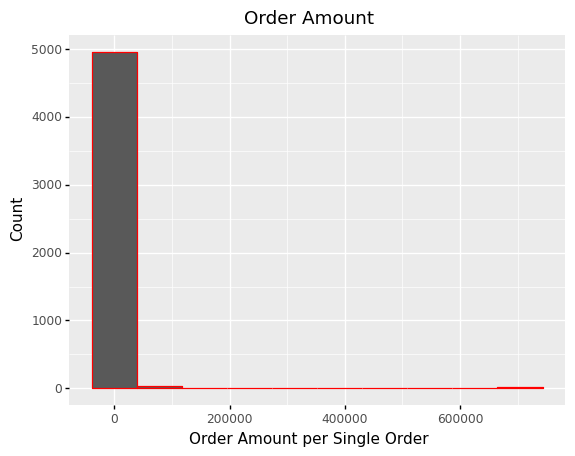

<ggplot: (8784101006617)>

In [77]:
(ggplot(df, aes(x="order_amount")) +
 geom_histogram(bins=10, color="red") +
 ggtitle("Order Amount") +
 xlab("Order Amount per Single Order") +
 ylab("Count")
 )

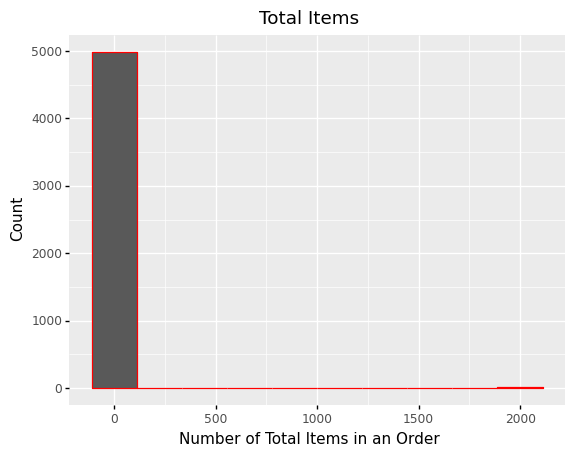

<ggplot: (8784101395613)>

In [31]:
(ggplot(df, aes(x="total_items")) +
 geom_histogram(bins=10, color="red") +
 ggtitle("Total Items") +
 xlab("Number of Total Items in an Order") +
 ylab("Count")
 )

The first thing to explore in these two plots are the huge empty space between bins. There are basically no observations betwen them. So we observe either small order amounts(expectancy) or terribly huge amounts(deviation). This is really dubious. Next thing to check how many users and shops are responsible for this.

I first groupby the sales by shop_id and user_id and get the mean order_amount

In [57]:
order_by_user = df.groupby(["shop_id", "user_id"])["order_amount"].sum().reset_index().sort_values("order_amount", ascending=False)

The grouped dataframe is already sorted descending. Let's see top 50

In [58]:
order_by_user.head(50)

,shop_id,user_id,order_amount
1927,42.0,607.0,11968000.0
3578,78.0,878.0,154350.0
3571,78.0,834.0,102900.0
3568,78.0,818.0,77175.0
3561,78.0,775.0,77175.0
3573,78.0,855.0,77175.0
3583,78.0,915.0,77175.0
3562,78.0,787.0,77175.0
3585,78.0,928.0,77175.0
3560,78.0,766.0,77175.0


There are few worth noting things here. First, shop_id 78 is occuring more than 40 times. So, most of those extreme values are coming from single shop. Is it a fraud? We can't tell it for sure because a brief google search revealed that there are premium shoe stores that are specialized in selling unique shoes that are signed by elite athletes etc. Let's dig further

In [72]:
df[df.shop_id==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161.0,78.0,990.0,25725.0,1.0,credit_card,2017-03-12 05:56:56.834
490,491.0,78.0,936.0,51450.0,2.0,debit,2017-03-26 17:08:18.911
493,494.0,78.0,983.0,51450.0,2.0,cash,2017-03-16 21:39:35.400
511,512.0,78.0,967.0,51450.0,2.0,cash,2017-03-09 07:23:13.640
617,618.0,78.0,760.0,51450.0,2.0,cash,2017-03-18 11:18:41.848
691,692.0,78.0,878.0,154350.0,6.0,debit,2017-03-27 22:51:43.203
1056,1057.0,78.0,800.0,25725.0,1.0,debit,2017-03-15 10:16:44.830
1193,1194.0,78.0,944.0,25725.0,1.0,debit,2017-03-16 16:38:25.551
1204,1205.0,78.0,970.0,25725.0,1.0,credit_card,2017-03-17 22:32:21.438
1259,1260.0,78.0,775.0,77175.0,3.0,credit_card,2017-03-27 09:27:19.843


Well, they have 46 unique orders, and we can't see any absurd number in total_items column. I would think that this shop might be one of those top tier shoes. Their payment method also not revealing any suspicious activity which would make me suspect credit card fraud. They also make cash sales. Now, I'll move on to the second   shop

In [62]:
df[df.shop_id==42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00.000
40,41.0,42.0,793.0,352.0,1.0,credit_card,2017-03-24 14:15:40.649
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 04:00:00.000
308,309.0,42.0,770.0,352.0,1.0,credit_card,2017-03-11 18:14:38.774
409,410.0,42.0,904.0,704.0,2.0,credit_card,2017-03-04 14:32:57.621
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 04:00:00.000
834,835.0,42.0,792.0,352.0,1.0,cash,2017-03-25 21:31:24.596
835,836.0,42.0,819.0,704.0,2.0,cash,2017-03-09 14:15:15.136
938,939.0,42.0,808.0,1056.0,3.0,credit_card,2017-03-13 23:43:45.330
979,980.0,42.0,744.0,352.0,1.0,debit,2017-03-12 13:09:03.570


As for shop 42, this is where it gets little bit trickier. Seems like single user is responsible for all of the extereme orders.
What can it be? All of them with credit card. Options are:
1) Someone is Making wholesale buy from a retail.
2) Some form of card fraud
3) Developers edge case testing, thus corrupting the database with fake entries.
4) A bug within the system. When certain conditions are met the system saves the entry with additional three zeroes. Look carefully, the shop 42 has records such as 2 item orders with 704$ order amount. And our extreme values exactly follow this pattern. 2 turns into 2000, 704 turns into 704000

If it was due to developer activity most probably it wouldn't take the whole month.
Credit card frauds do not generally last a month either.
the bug theory is also a weak one because then why would user 607 would make repeated orders?
Wholesale buying from a retail? If the buyer thinks it's a good deal for their circumstances, why not.

With this amount of information at our disposal it's hard to decide whether it's card fraud or any of the theories above or a mix of them. It can well be the case that user 607 is a friendly developer who is trying to fix that bug, that's why repeatedly testing the system at different times.

In [64]:
df[df.user_id==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 04:00:00
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 04:00:00
1104,1105.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-24 04:00:00
1362,1363.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-15 04:00:00
1436,1437.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-11 04:00:00
1562,1563.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-19 04:00:00
1602,1603.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-17 04:00:00
2153,2154.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-12 04:00:00
2297,2298.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00


Well, assuming that shop 78 is a genuine high profile shop, the only fraudulent or corrupted entries are from user 607.

In [75]:
print(df[df.user_id!=607]["order_amount"].mean())

754.0919125025085


and if we wish to kick out shop 78 as well:

In [76]:
print(df[(df.user_id!=607) & (df.shop_id!=78)]["order_amount"].mean())

302.58051448247926


## Evaluation
As I said above, if each store sells only one pair of shoes that is unique to them, then shop 78 is can be clustered as high profile store. If there is uniformity in the dataset as per shoe type. Then fraudulent activity lies in shop 78 and shop 42, especially the user 607 being the main actor.


I would report median average sales for this data. Which is 284


# 2) SQL CHALLENGE

 For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

## How many orders were shipped by Speedy Express in total?
> SELECT COUNT(OrderID) FROM Orders
   WHERE ShipperID =
   (SELECT ShipperID FROM Shippers
   WHERE ShipperName = 'Speedy Express');

**The answer is 54**


## What is the last name of the employee with the most orders?
>SELECT LastName FROM Employees
  WHERE EmployeeID = (SELECT TOP 1 EmployeeID FROM
  (SELECT EmployeeID, COUNT(OrderID) FROM Orders GROUP BY EmployeeID ORDER BY COUNT(OrderID) DESC));

**The answer is Peacock**

## What product was ordered the most by customers in Germany?

>SELECT ProductName FROM Products
WHERE ProductID IN (SELECT TOP 1 ProductID FROM OrderDetails
WHERE OrderID IN (
SELECT OrderID FROM Orders
WHERE CustomerID IN (SELECT CustomerID FROM Customers
WHERE Country = 'Germany'))
GROUP BY ProductID
ORDER BY COUNT(OrderDetailID) DESC);

**The answer is Gorgonzola Telino**